# Import Library dan Load Data

Pergerakan harga saham HCL Technologies. HCL Technologies adalah perusahaan konsultan dan layanan teknologi informasi multinasional India yang berkantor pusat di Noida. Ini adalah anak perusahaan dari HCL Enterprise

- Open adalah harga pembukaan saham pada saat transaksi dimulai dalam suatu periode transaksi. Biasanya, harga pembukaan sama dengan harga penutupan transaksi hari sebelumnya.

- High menunjukkan harga tertinggi yang pernah terjadi dalam suatu periode perdagangan.

- Low menunjukkan harga terendah yang pernah terjadi dalam suatu periode perdagangan.

- Close menunjukkan harga penutupan suatu saham dalam satu hari perdagangan.

- Adj. Close adalah harga penutupan saham yang sudah disesuaikan (adjusted closing price)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("HCLTECH.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-24,406.500000,412.000000,404.625000,409.774994,368.495819,1373968
1,2017-04-25,412.000000,412.924988,406.799988,409.975006,368.675720,2194602
2,2017-04-26,410.950012,411.000000,398.274994,400.125000,359.817932,1918248
3,2017-04-27,398.500000,410.000000,398.100006,404.850006,364.066956,5640334
4,2017-04-28,406.450012,410.000000,399.875000,407.049988,366.045227,2794138
...,...,...,...,...,...,...,...
1322,2022-08-26,948.549988,956.000000,943.750000,945.650024,945.650024,2195046
1323,2022-08-29,912.599976,922.000000,900.099976,917.500000,917.500000,4974880
1324,2022-08-30,926.900024,945.250000,923.700012,938.950012,938.950012,2998417
1325,2022-09-01,917.299988,931.000000,916.250000,926.049988,926.049988,2953921


# Eksplorasi Data

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.isnull().sum()/len(data)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [6]:
data = data.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')

In [7]:
print(data.dtypes)

Date     object
High    float64
dtype: object


In [8]:
data

,Date,High
0,2017-04-24,412.000000
1,2017-04-25,412.924988
2,2017-04-26,411.000000
3,2017-04-27,410.000000
4,2017-04-28,410.000000
...,...,...
1322,2022-08-26,956.000000
1323,2022-08-29,922.000000
1324,2022-08-30,945.250000
1325,2022-09-01,931.000000


In [9]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27',
               '2017-04-28', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-08',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-09-01', '2022-09-02'],
              dtype='datetime64[ns]', name='Date', length=1327, freq=None)

In [10]:
data

,High
Date,
2017-04-24,412.000000
2017-04-25,412.924988
2017-04-26,411.000000
2017-04-27,410.000000
2017-04-28,410.000000
...,...
2022-08-26,956.000000
2022-08-29,922.000000
2022-08-30,945.250000


In [11]:
#Menginisialkan variabel High sebagai data time series
ts = data['High']
ts.head(10)

Date
2017-04-24    412.000000
2017-04-25    412.924988
2017-04-26    411.000000
2017-04-27    410.000000
2017-04-28    410.000000
2017-05-02    412.725006
2017-05-03    418.750000
2017-05-04    421.299988
2017-05-05    416.000000
2017-05-08    422.500000
Name: High, dtype: float64

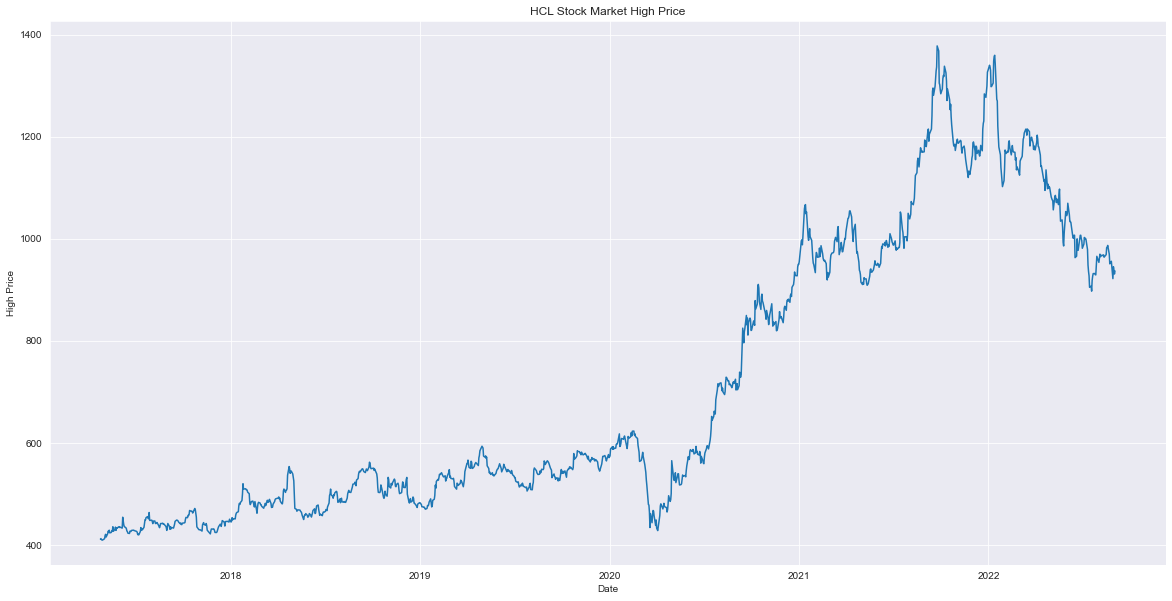

In [12]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('HCL Stock Market High Price')
plt.plot(data['High'])

## Uji Stasioneritas Data

In [13]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Uji Hipotesis:

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

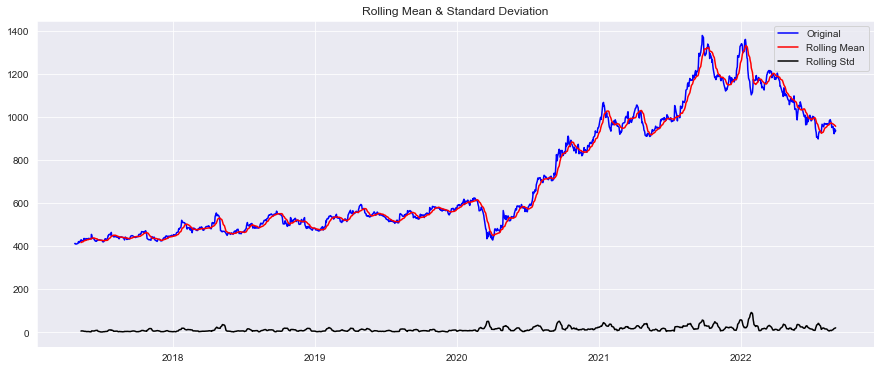

Results of Dickey-Fuller Test:
Test Statistic                   -1.040674
p-value                           0.738142
#Lags Used                       18.000000
Number of Observations Used    1308.000000
Critical Value (1%)              -3.435359
Critical Value (5%)              -2.863752
Critical Value (10%)             -2.567948
dtype: float64


In [14]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

Diperoleh nilai p-value > 0,05, maka H0 tidak ditolak.

Jadi, data memiliki keadaan yang tidak stasioner.

Karena data belum stasioner, sehingga perlu dilakukan proses stasionerisasi data, yakni dengan proses differencing untuk memperoleh data yang stasioner.

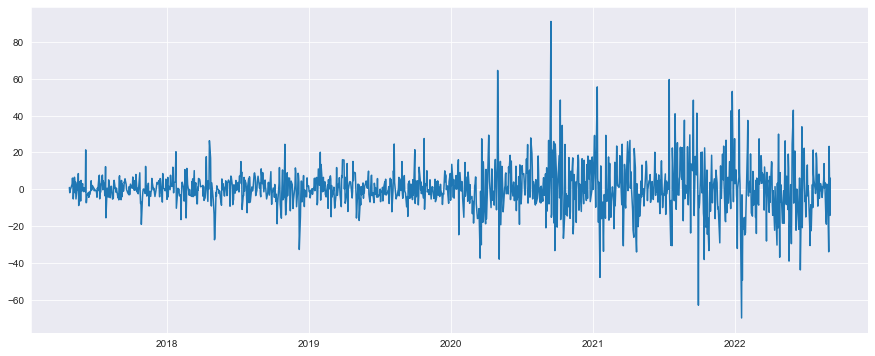

In [15]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

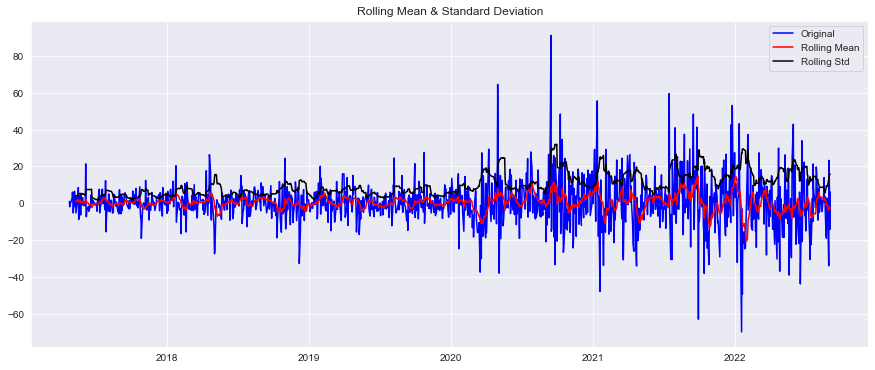

Results of Dickey-Fuller Test:
Test Statistic                -8.263828e+00
p-value                        5.000031e-13
#Lags Used                     1.700000e+01
Number of Observations Used    1.308000e+03
Critical Value (1%)           -3.435359e+00
Critical Value (5%)           -2.863752e+00
Critical Value (10%)          -2.567948e+00
dtype: float64


In [16]:
test_stationarity(ts_diff_1)

Setelah dilakukan proses differencing dan diuji stasioneritas data (setelah differencing), diperoleh data setelah differencing 1x telah membentuk data yang stasioner.

C:\Users\ABL\anaconda3\COnda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


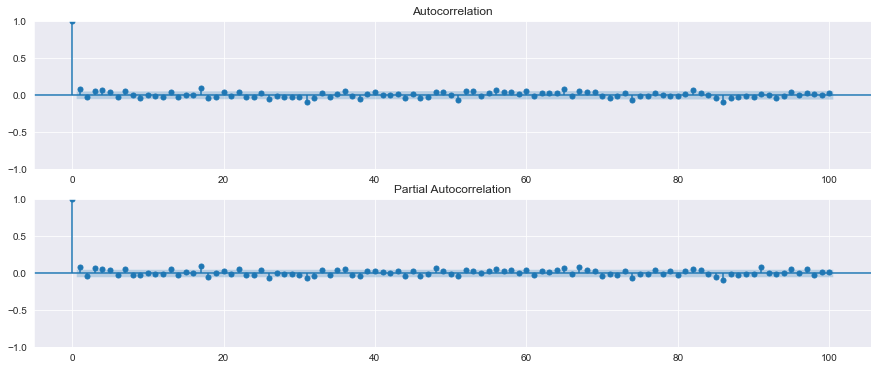

In [17]:
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()

Plot ACF dan plot PACF dibentuk untuk mengetahui orde dari AR dan MA, sehingga bisa diketahui model yang sesuai untuk data.

In [18]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [19]:
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 1)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Setelah dilakukan percobaan dengan model ARIMA(p,d,q) dengan:

- orde p = 0 dan 1
- orde d = 0 dan 1
- orde q = 0 dan 1

Diperoleh model yang menghasilkan RMSE terkecil adalah model ARIMA (1,1,1).

Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-1 dan dataset telah mengalami 1x proses differencing.

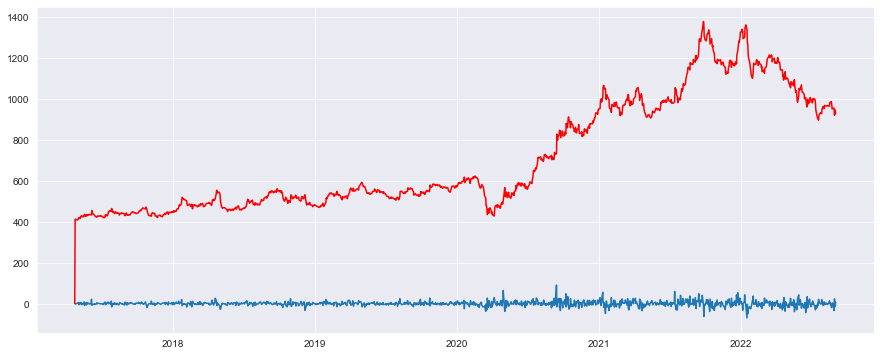

In [20]:
#Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(1,1,1)
model = sm.tsa.arima.ARIMA(ts, order=(1,1,1))
results = model.fit()
predictions_ARIMA = pd.Series(results.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

In [22]:
#Informasi yang diperoleh dari pemodelan ARIMA(1,1,1) pada dataset
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1327
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5166.406
Date:                Mon, 12 Sep 2022   AIC                          10338.813
Time:                        14:52:34   BIC                          10354.383
Sample:                             0   HQIC                         10344.649
                               - 1327                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9479      0.013    -71.221      0.000      -0.974      -0.922
ma.L1          0.9850      0.008    129.552      0.000       0.970       1.000
sigma2       141.7986      2.785     50.917      0.000     136.340     147.257
===================================================================================
Ljung-Box (L1) (Q):                   4.28   Jarque-Bera (JB):              2442.45
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               6.33   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediksi Data

In [ ]:
#Prediksi data dengan model ARIMA(1,1,1) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=1328,end=1331)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

Diperoleh hasil prediksi untuk nilai harga tertinggi saham HCLTECH pada periode tanggal :
- 03 September 2022 = 939,81..
- 04 September 2022 = 940,73..
- 05 September 2022 = 944,22..
- 06 September 2022 = 946,04..

In [23]:
## KESMIPULAN ##
1. modifikasi pada orde p,d,q dengan value (0,1)
2. Penggunaan tsaplots pada ARIMA
3. Hasilnya yaitu perbedaan pada values dan plot yang dihasilkan oleh ARIMA

SyntaxError: invalid syntax (130048715.py, line 2)